<a href="https://colab.research.google.com/github/HwiTran/IntroMachineLearningCourse/blob/main/SVM_MLP_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Analyze
2. Preprocess data
3. Feature Engineering
4. Build Model Pipeline
5. Measure performance of the model.
6. Which metric is your main metric for this problem and why? What is your main model as well as their params and why? Your comment


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable.
3. Data Analysis is correct or make sense
4. The data preprocessing is correct or make sense
5. The Feature engineering is correct or make sense
6. Model pipeline
7. Any other additional process will be considered a small plus point.

Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:

User demographic information
Browsing behavior
Historical purchase data among other information
It factors in our unique and proprietary predictions of how long a user will remain a customer. This score is updated every day for all users who have a minimum of one conversion. The values assigned are between 1 and 5.

## Load Dataset

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd
PATH = "/content/drive/MyDrive/ML/credit_fraud.csv"

df = pd.read_csv(PATH)
df.head()
#ToDo: Show histogram of dataframe

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'ID'}>,
        <Axes: title={'center': 'NO_OF_CHILD'}>,
        <Axes: title={'center': 'INCOME'}>],
       [<Axes: title={'center': 'FLAG_MOBIL'}>,
        <Axes: title={'center': 'WORK_PHONE'}>,
        <Axes: title={'center': 'PHONE'}>,
        <Axes: title={'center': 'E_MAIL'}>],
       [<Axes: title={'center': 'FAMILY SIZE'}>,
        <Axes: title={'center': 'BEGIN_MONTH'}>,
        <Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'YEARS_EMPLOYED'}>],
       [<Axes: title={'center': 'TARGET'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

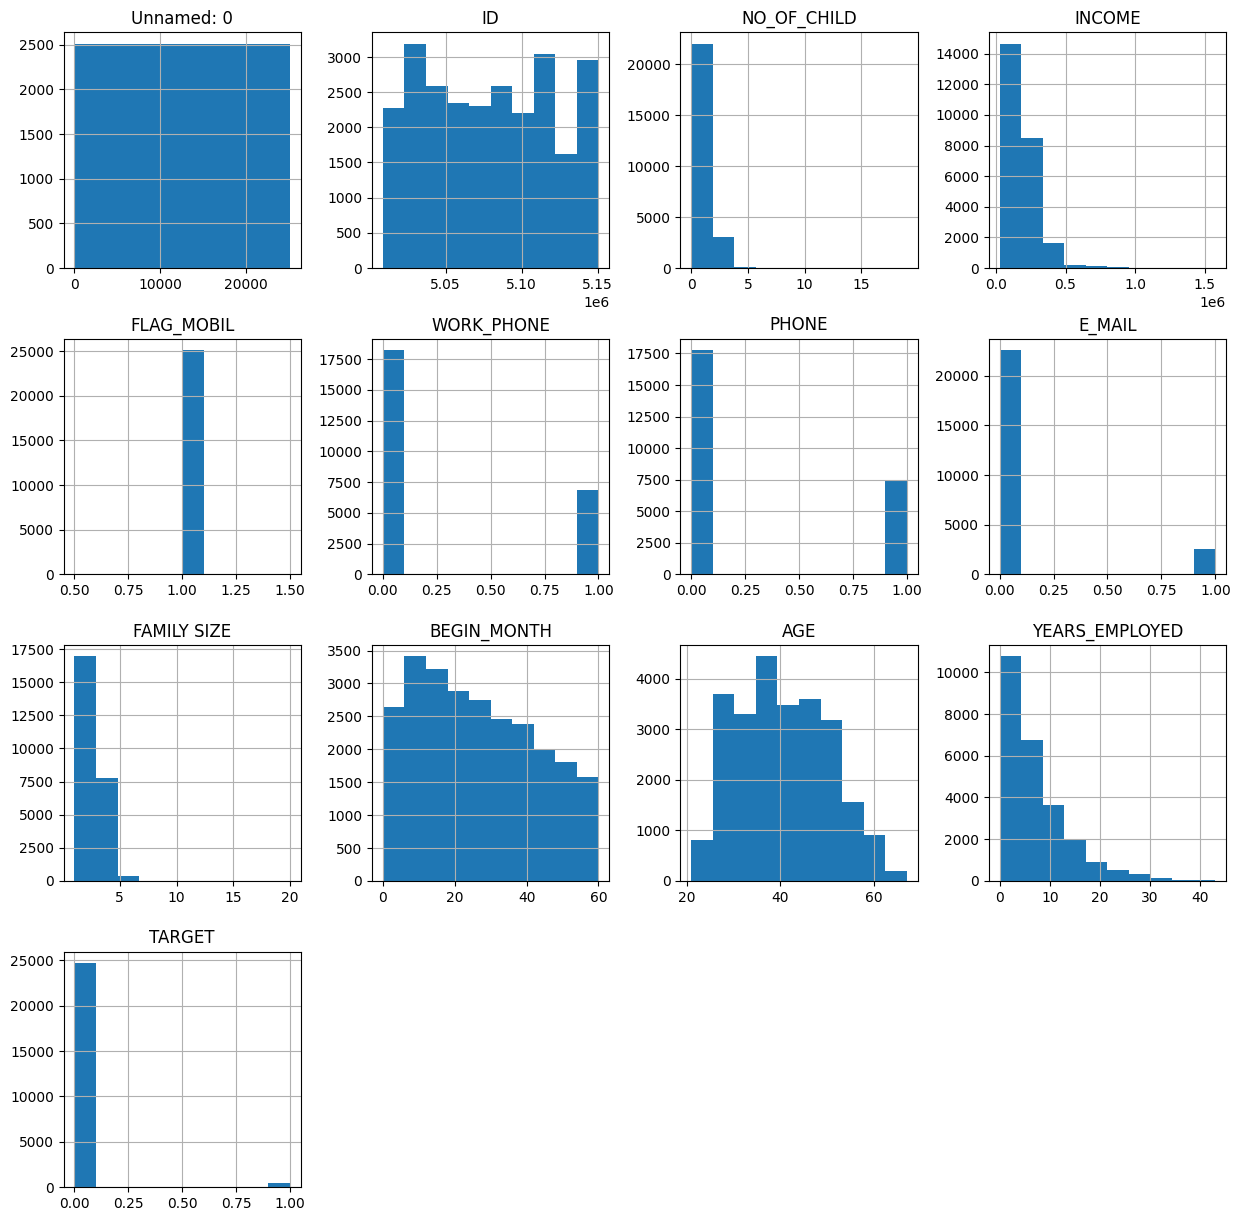

In [20]:
df.hist(figsize=(15,15))

## Data Analysis

In [21]:
# Data analysis
# Todo: analyze your data here

In [22]:
#The first 5 samples
df.head(5)

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
0,0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,29,59,3,0
1,1,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,4,52,8,0
2,2,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
3,3,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,26,52,8,0
4,4,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,1.0,38,52,8,0


In [23]:
#The last 5 samples
df.tail(5)

,Unnamed: 0,ID,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,INCOME_TYPE,EDUCATION_TYPE,FAMILY_TYPE,HOUSE_TYPE,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
25129,25129,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,11,48,7,1
25130,25130,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,1,0,1,1,2.0,23,34,4,1
25131,25131,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,1,0,1,1,2.0,32,34,4,1
25132,25132,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,2.0,9,49,2,1
25133,25133,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1,0,0,0,1.0,13,25,3,1


In [24]:
#Display the number of rows and columns in the dataset
df.shape

(25134, 20)

In [25]:
#Display feature collumns
df.columns

Index(['Unnamed: 0', 'ID', 'GENDER', 'CAR', 'REALITY', 'NO_OF_CHILD', 'INCOME',
       'INCOME_TYPE', 'EDUCATION_TYPE', 'FAMILY_TYPE', 'HOUSE_TYPE',
       'FLAG_MOBIL', 'WORK_PHONE', 'PHONE', 'E_MAIL', 'FAMILY SIZE',
       'BEGIN_MONTH', 'AGE', 'YEARS_EMPLOYED', 'TARGET'],
      dtype='object')

In [26]:
#Display summary statistics for numerical variables
df.describe()

,Unnamed: 0,ID,NO_OF_CHILD,INCOME,FLAG_MOBIL,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,AGE,YEARS_EMPLOYED,TARGET
count,25134.000000,2.513400e+04,25134.000000,2.513400e+04,25134.0,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000,25134.000000
mean,12566.500000,5.078838e+06,0.512334,1.948339e+05,1.0,0.273812,0.292791,0.100660,2.294064,26.120594,40.536166,7.204106,0.016790
std,7255.705169,4.194102e+04,0.787785,1.045110e+05,0.0,0.445923,0.455052,0.300885,0.947590,16.439658,9.559474,6.414231,0.128486
min,0.000000,5.008806e+06,0.000000,2.700000e+04,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,21.000000,0.000000,0.000000
25%,6283.250000,5.042228e+06,0.000000,1.350000e+05,1.0,0.000000,0.000000,0.000000,2.000000,12.000000,33.000000,3.000000,0.000000
50%,12566.500000,5.079004e+06,0.000000,1.800000e+05,1.0,0.000000,0.000000,0.000000,2.000000,24.000000,40.000000,5.000000,0.000000
75%,18849.750000,5.115604e+06,1.000000,2.250000e+05,1.0,1.000000,1.000000,0.000000,3.000000,39.000000,48.000000,10.000000,0.000000
max,25133.000000,5.150487e+06,19.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,20.000000,60.000000,67.000000,43.000000,1.000000


In [27]:
#Summarize the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25134 entries, 0 to 25133
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      25134 non-null  int64  
 1   ID              25134 non-null  int64  
 2   GENDER          25134 non-null  object 
 3   CAR             25134 non-null  object 
 4   REALITY         25134 non-null  object 
 5   NO_OF_CHILD     25134 non-null  int64  
 6   INCOME          25134 non-null  float64
 7   INCOME_TYPE     25134 non-null  object 
 8   EDUCATION_TYPE  25134 non-null  object 
 9   FAMILY_TYPE     25134 non-null  object 
 10  HOUSE_TYPE      25134 non-null  object 
 11  FLAG_MOBIL      25134 non-null  int64  
 12  WORK_PHONE      25134 non-null  int64  
 13  PHONE           25134 non-null  int64  
 14  E_MAIL          25134 non-null  int64  
 15  FAMILY SIZE     25134 non-null  float64
 16  BEGIN_MONTH     25134 non-null  int64  
 17  AGE             25134 non-null 

In [28]:
#Categorical features
categorical_col=df.select_dtypes(include=['object']).columns

#Numberical features
numerical_col=df.select_dtypes(include=['int64','float64']).columns

print(categorical_col)
print(numerical_col)


Index(['GENDER', 'CAR', 'REALITY', 'INCOME_TYPE', 'EDUCATION_TYPE',
       'FAMILY_TYPE', 'HOUSE_TYPE'],
      dtype='object')
Index(['Unnamed: 0', 'ID', 'NO_OF_CHILD', 'INCOME', 'FLAG_MOBIL', 'WORK_PHONE',
       'PHONE', 'E_MAIL', 'FAMILY SIZE', 'BEGIN_MONTH', 'AGE',
       'YEARS_EMPLOYED', 'TARGET'],
      dtype='object')


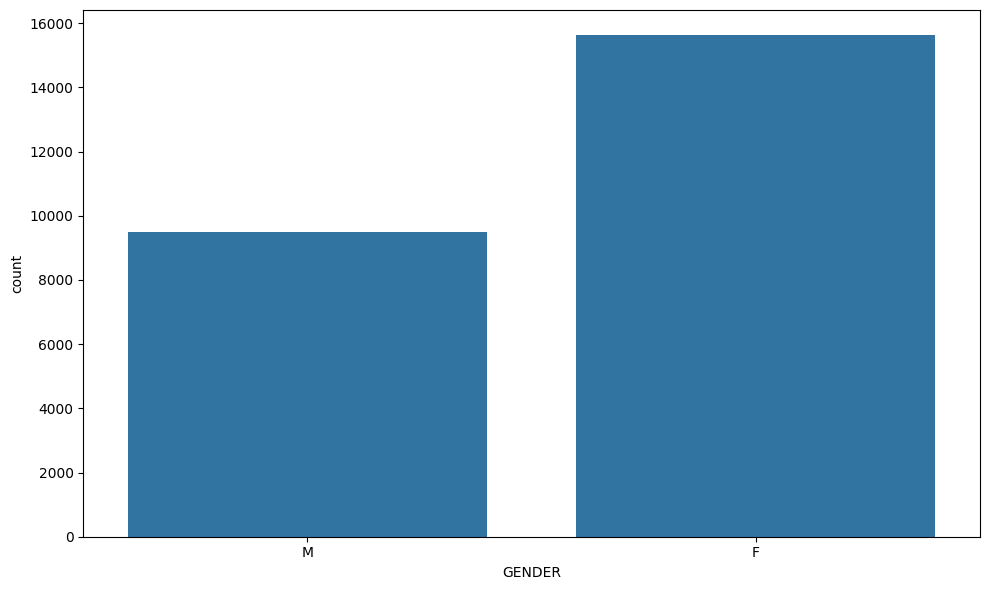

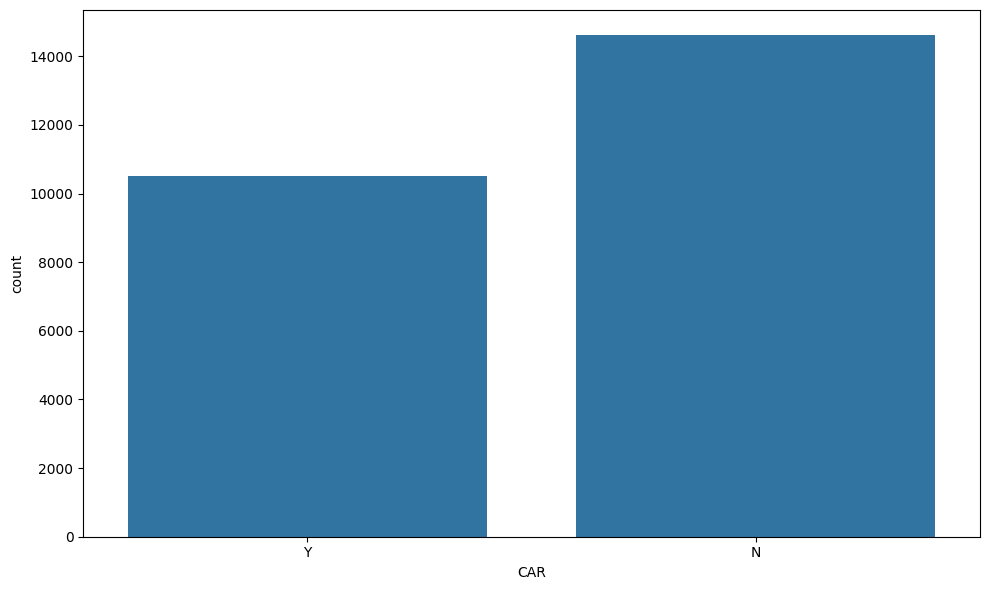

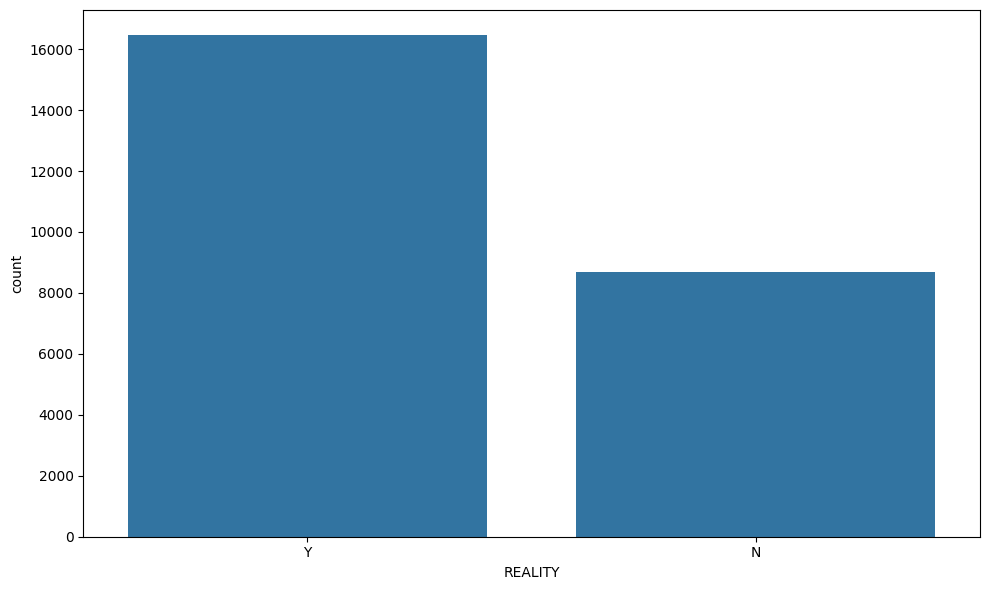

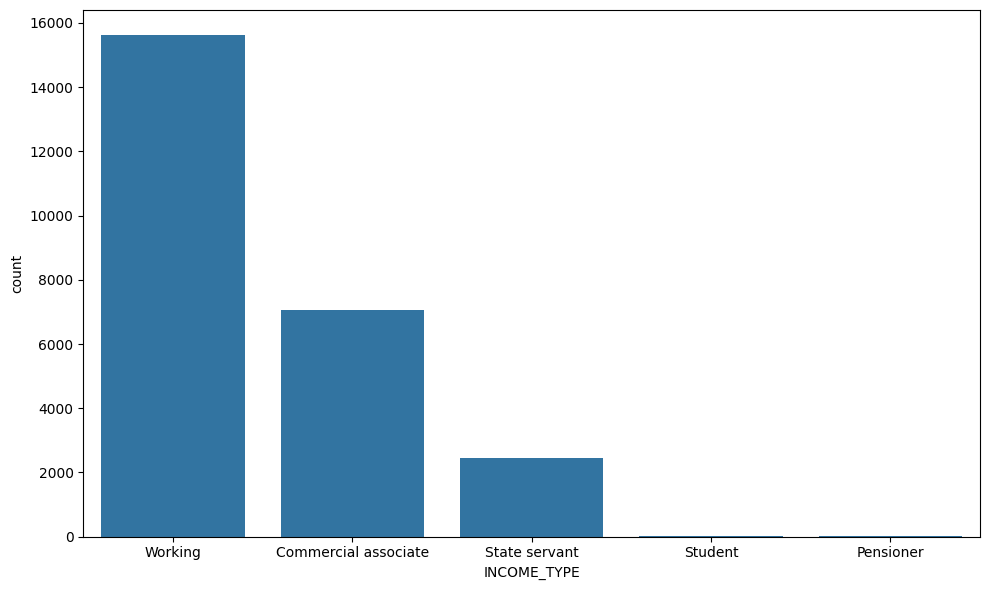

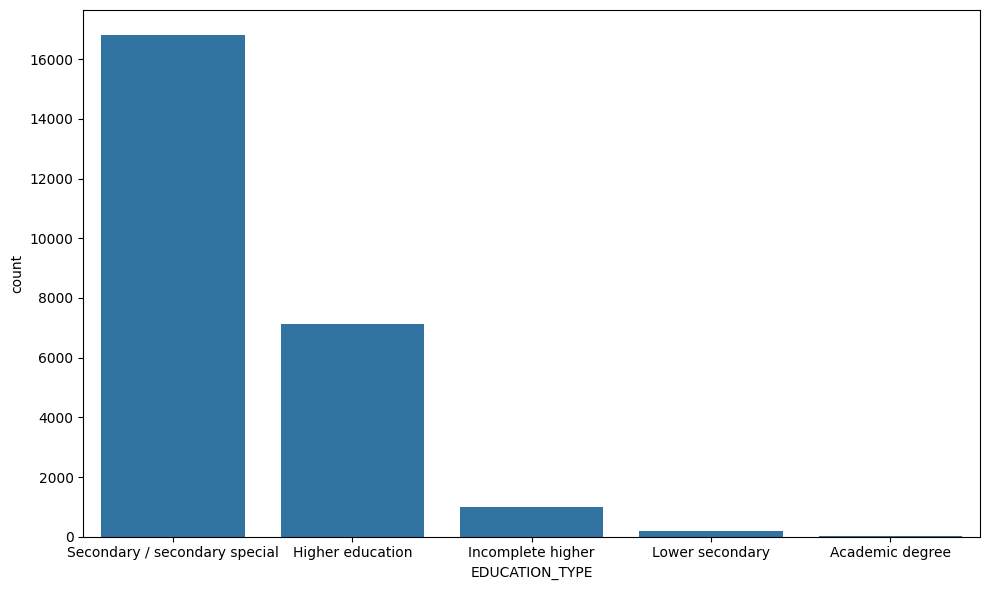

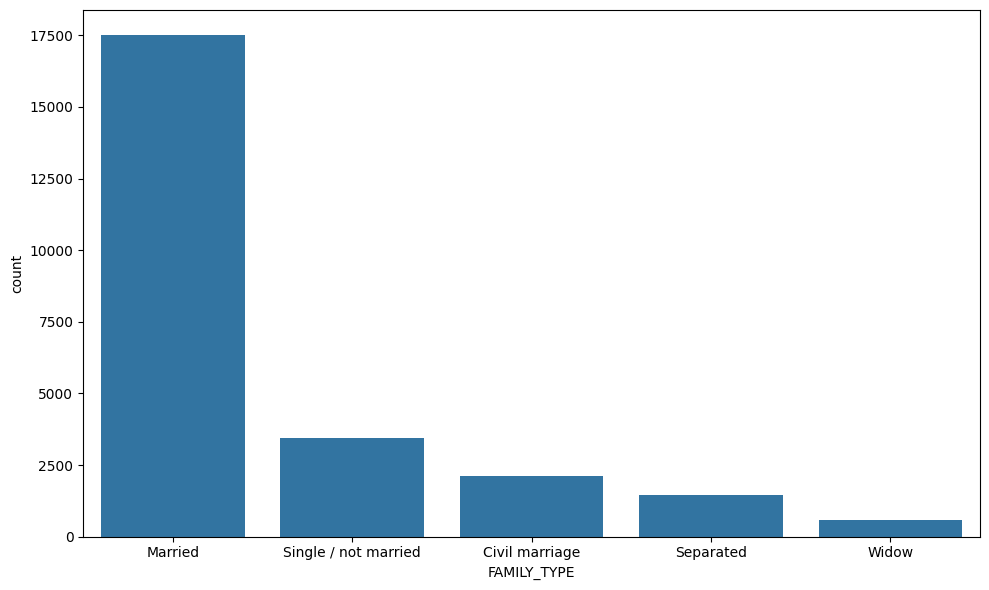

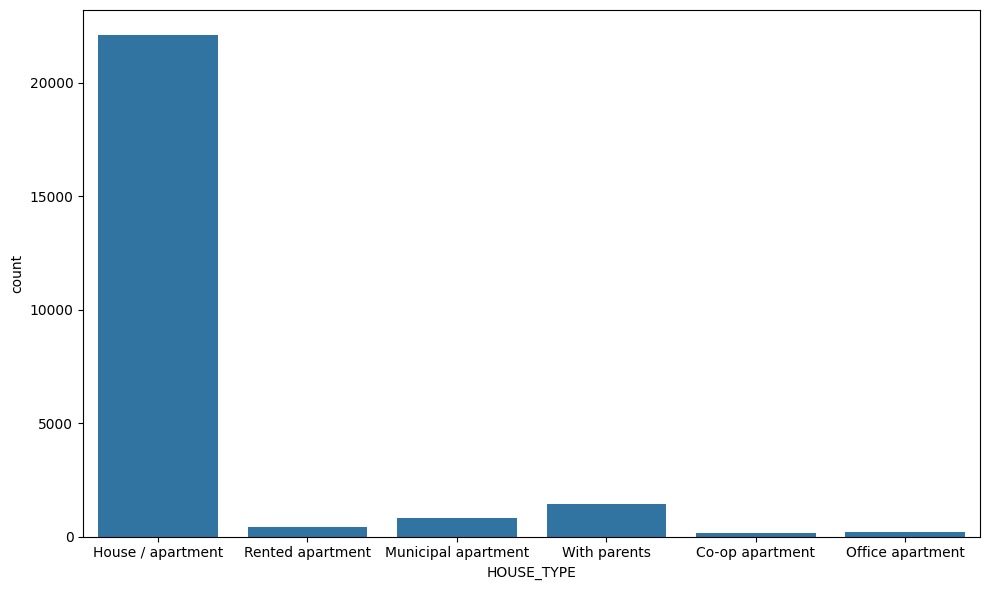

In [29]:
#Visualize categorical features
for col in categorical_col:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col,data=df)
    plt.tight_layout()
    plt.show()


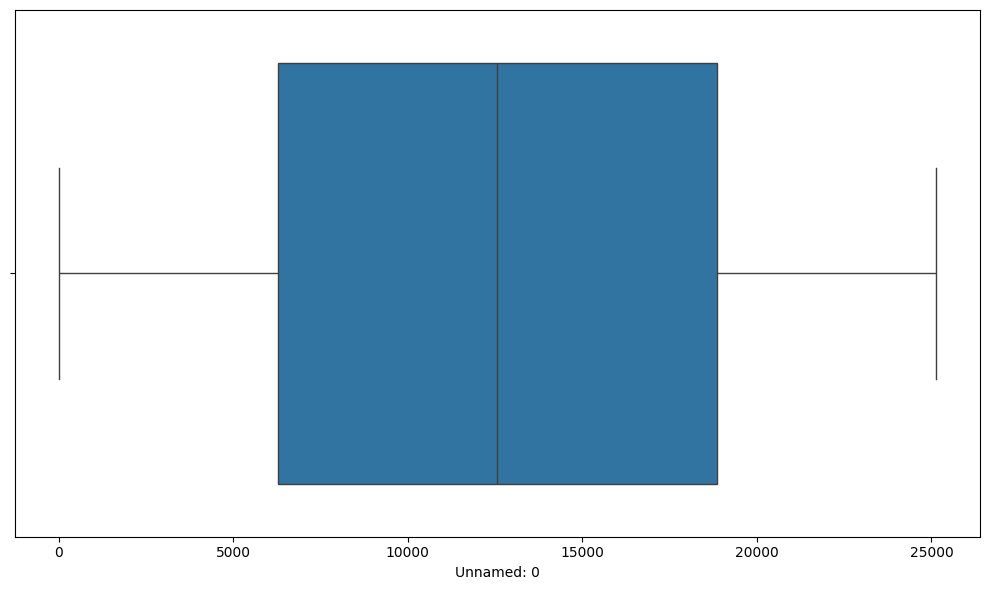

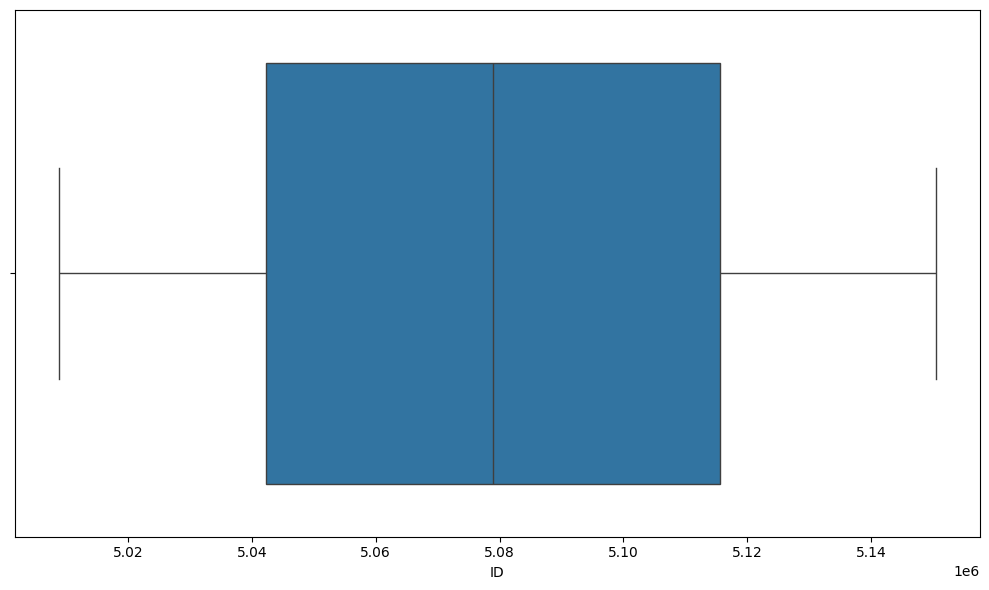

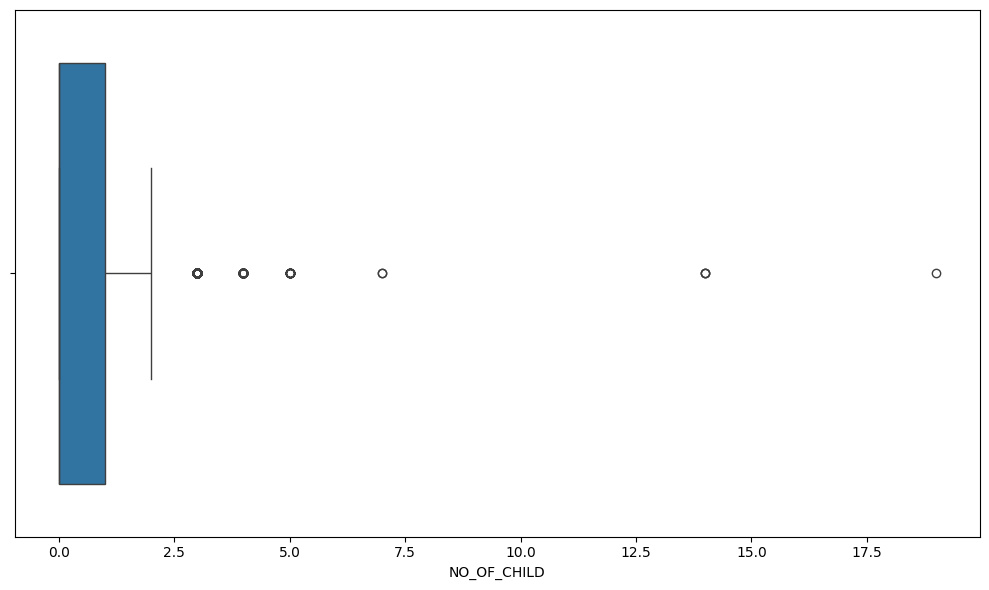

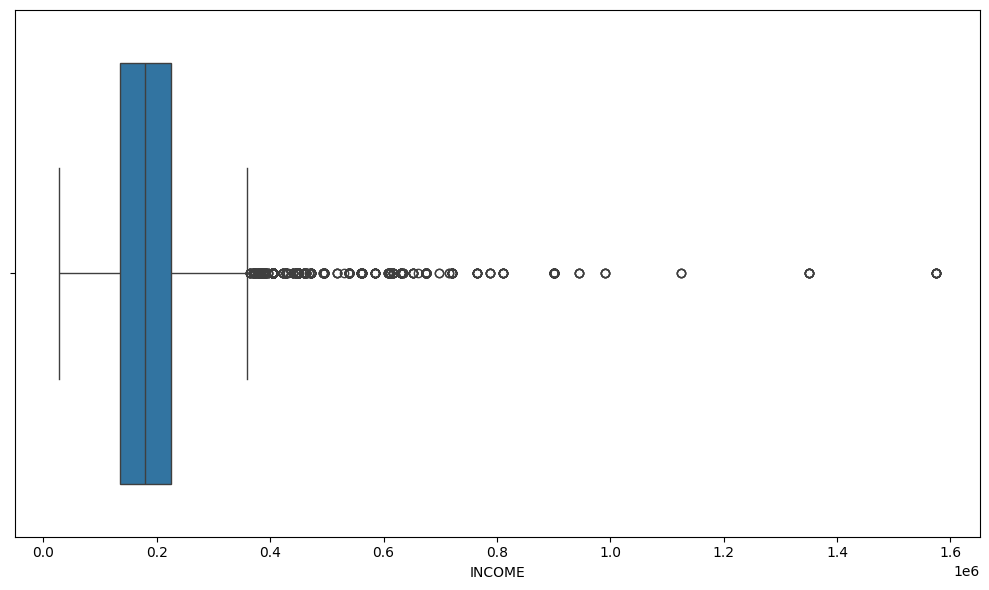

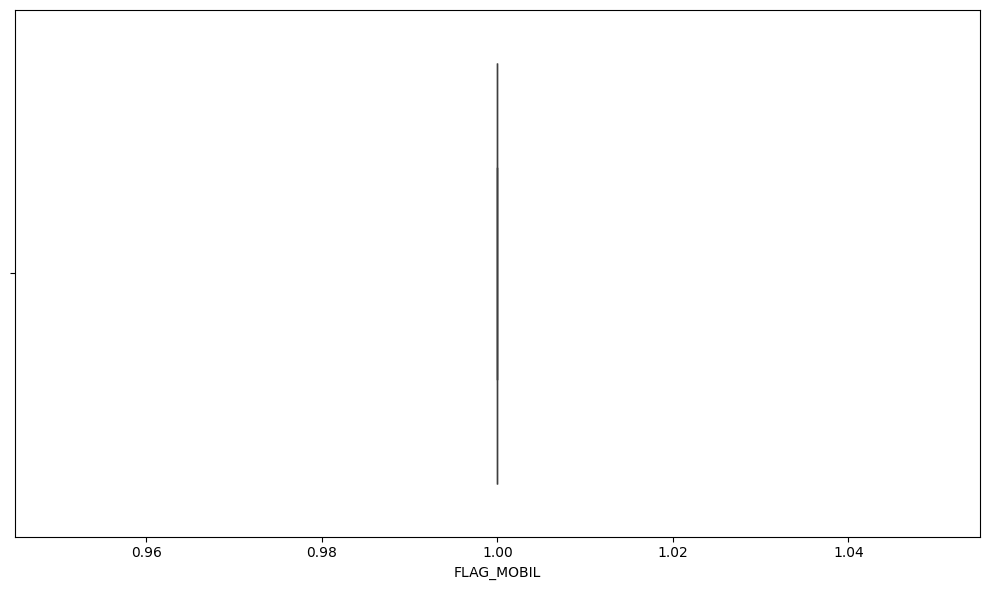

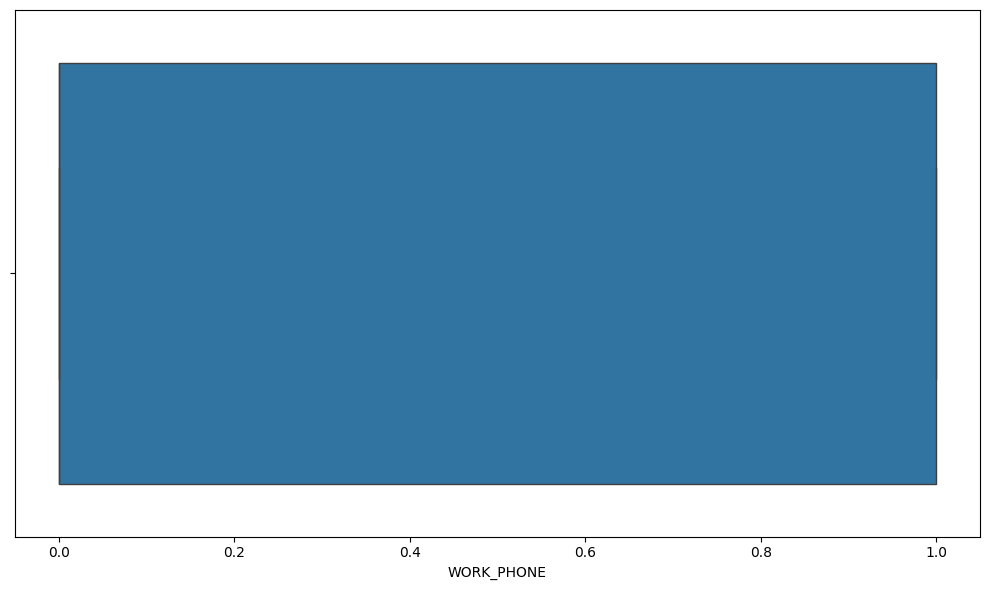

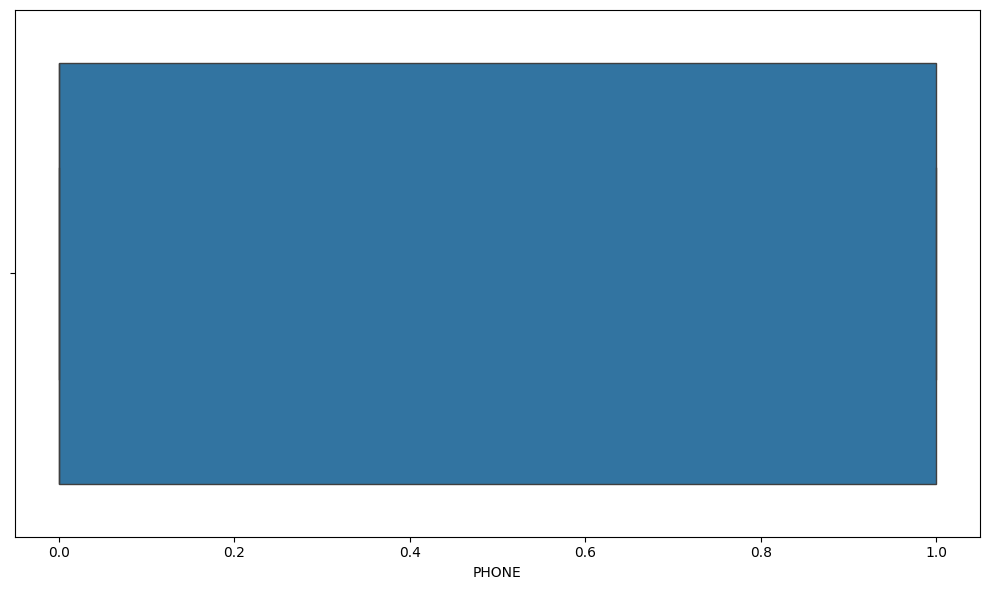

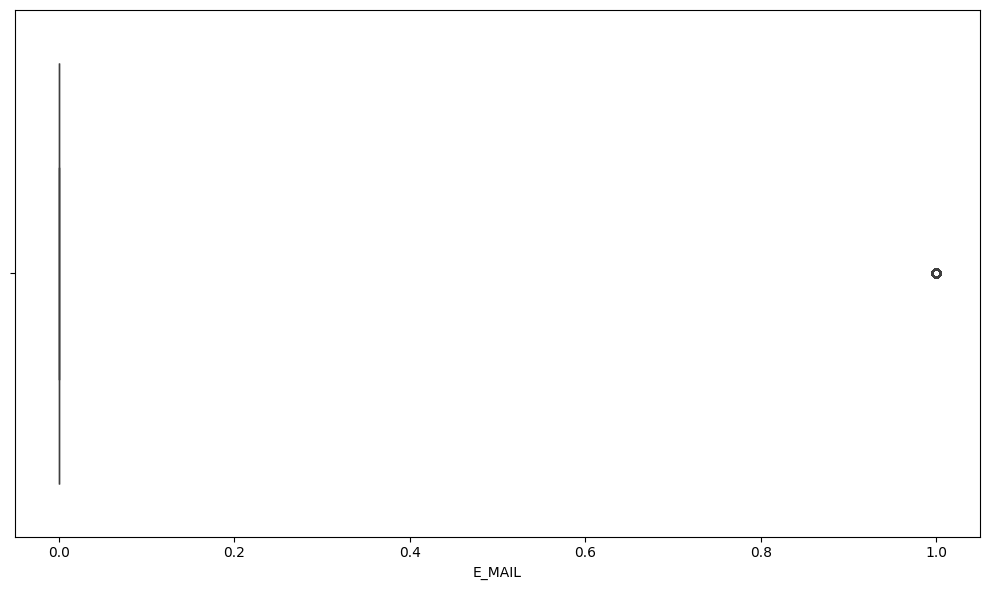

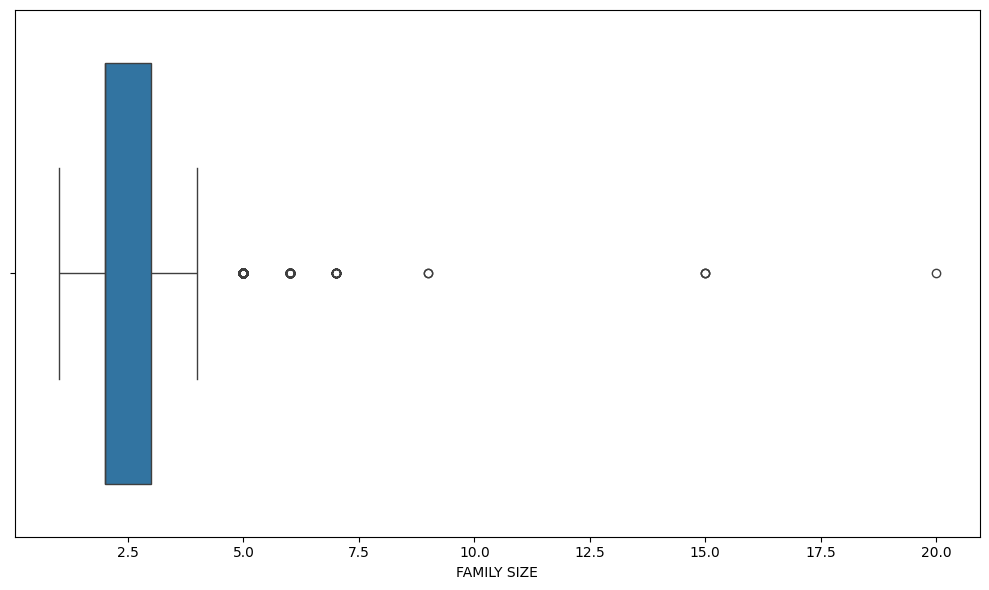

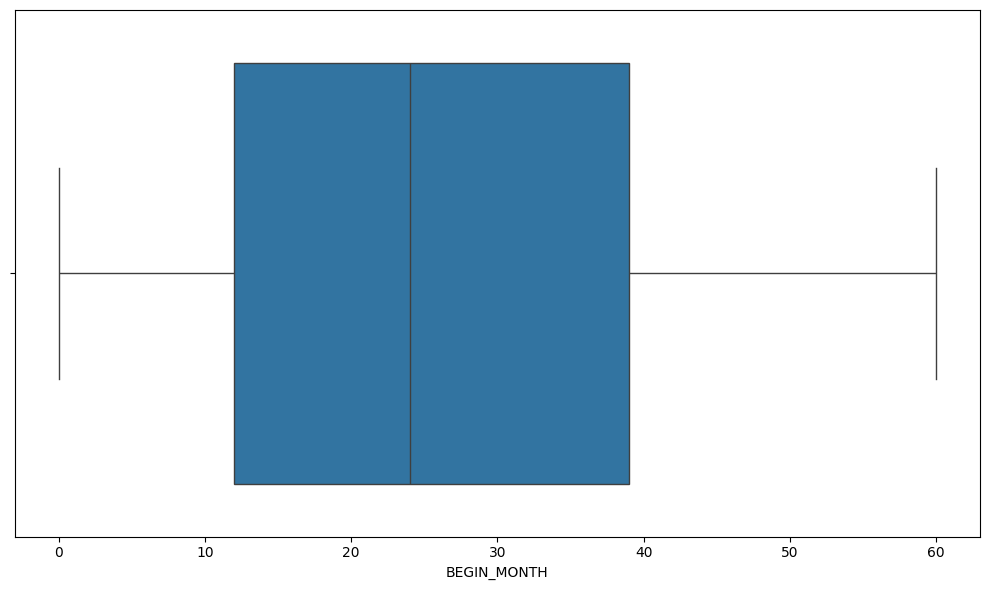

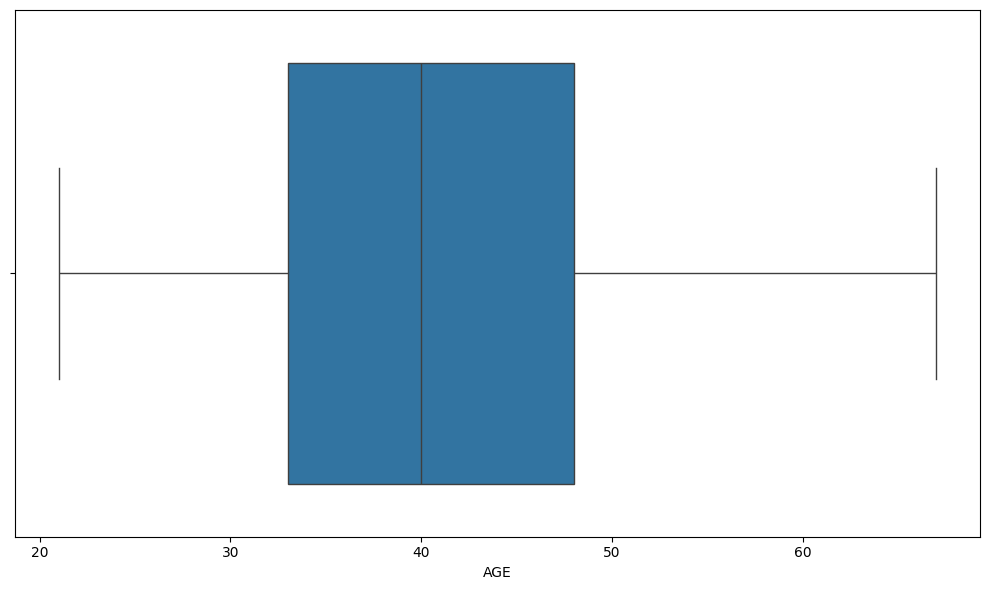

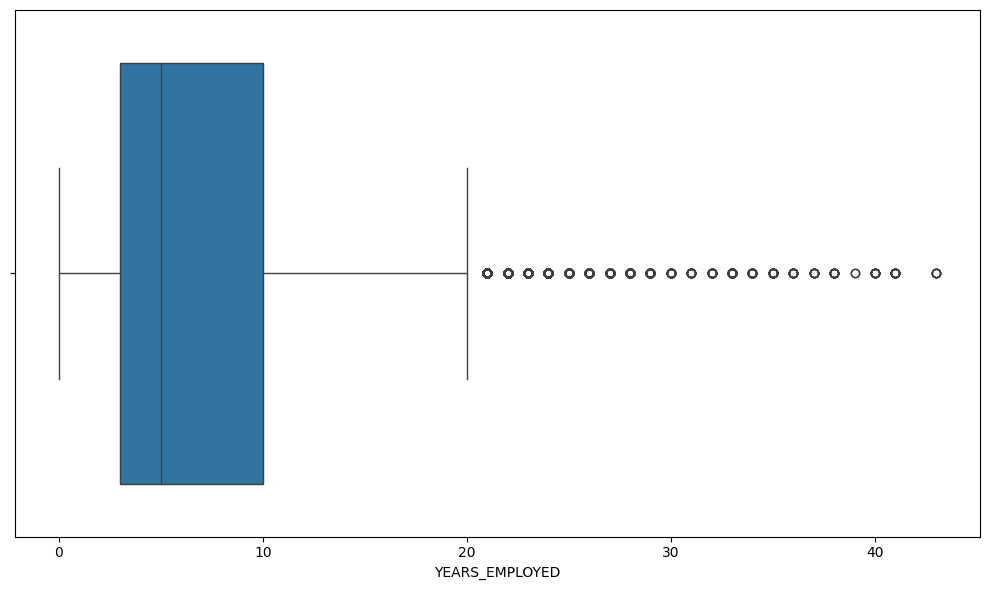

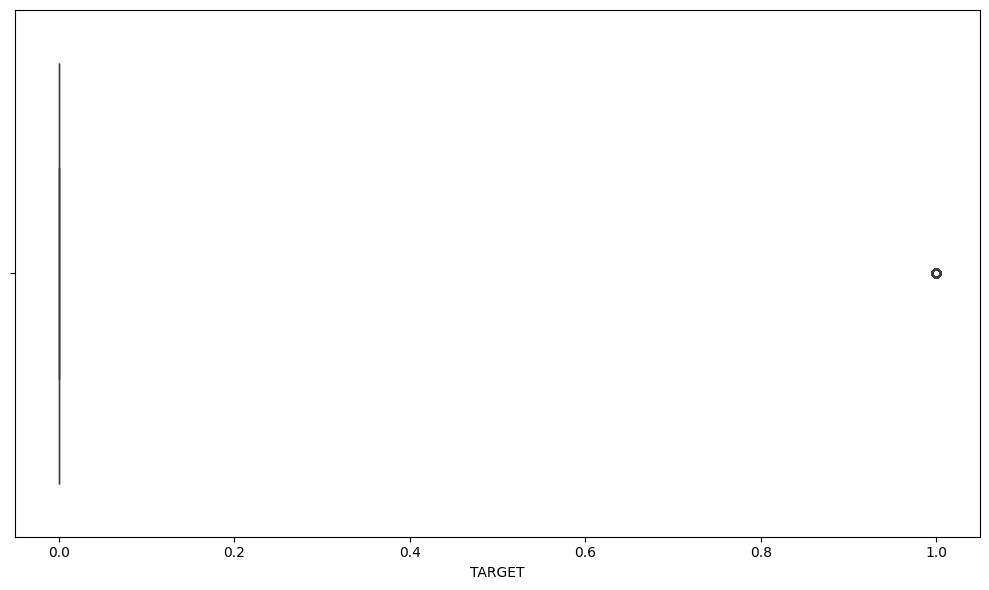

In [30]:
#Boxplot for numberical colummns
for col in numerical_col:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col,data=df)
    plt.tight_layout()
    plt.show()

In [31]:
#Sort 'NO_OF_CHILD'
df['NO_OF_CHILD'].sort_values(ascending=False).head(10)

17286    19
9938     14
9939     14
9940     14
20443     7
20442     7
16375     5
17582     5
21911     5
17583     5
Name: NO_OF_CHILD, dtype: int64

In [32]:
#Print outliner samples in numerical columns
for col in ['NO_OF_CHILD','FAMILY SIZE']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}:")
    print(outliers)

Outliers in NO_OF_CHILD:
       Unnamed: 0       ID GENDER CAR REALITY  NO_OF_CHILD    INCOME  \
18             18  5008836      M   Y       Y            3  270000.0   
19             19  5008837      M   Y       Y            3  270000.0   
1493         1493  5021500      M   Y       Y            4  292500.0   
1494         1494  5113188      M   Y       Y            4  292500.0   
1550         1550  5021620      F   Y       Y            3  126000.0   
...           ...      ...    ...  ..     ...          ...       ...   
24928       24928  5033749      F   N       Y            3   90000.0   
25051       25051  5105737      M   N       Y            3  292500.0   
25052       25052  5105738      F   N       N            3  292500.0   
25053       25053  5105739      F   N       Y            3  292500.0   
25069       25069  5116258      F   N       Y            4  180000.0   

                INCOME_TYPE                 EDUCATION_TYPE FAMILY_TYPE  \
18                  Working  Seconda

In [33]:
#Check the balance between classes in data
df['TARGET'].value_counts()

TARGET
0    24712
1      422
Name: count, dtype: int64

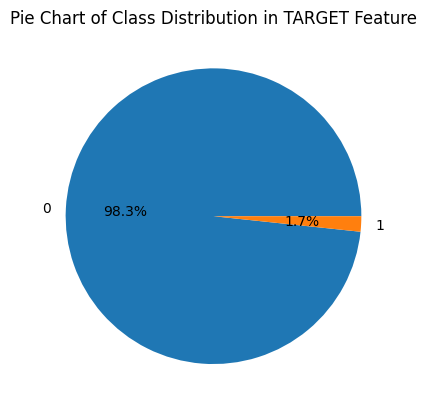

In [34]:
# Plot the pie chart for class distribution
plt.pie(df['TARGET'].value_counts(), labels=df['TARGET'].unique(), autopct="%1.1f%%")
plt.title("Pie Chart of Class Distribution in TARGET Feature")
plt.show()


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Working'),
  Text(1, 0, 'Commercial associate'),
  Text(2, 0, 'State servant'),
  Text(3, 0, 'Student'),
  Text(4, 0, 'Pensioner')])

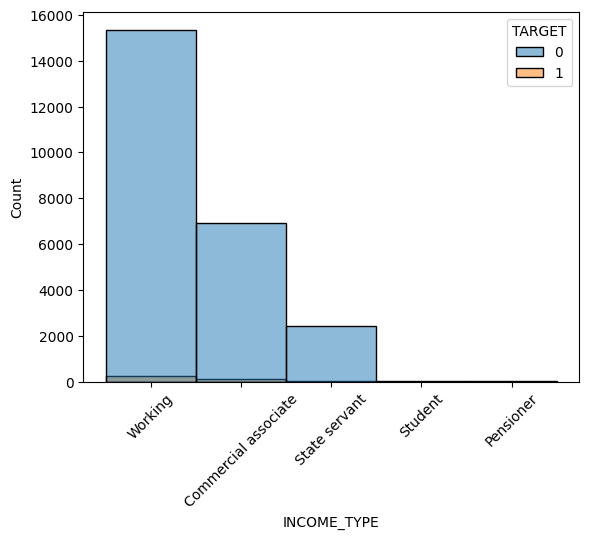

In [37]:
# check "INCOME_TYPE" distribution
sns.histplot(df, x='INCOME_TYPE', hue='TARGET')
plt.xticks(rotation=45)

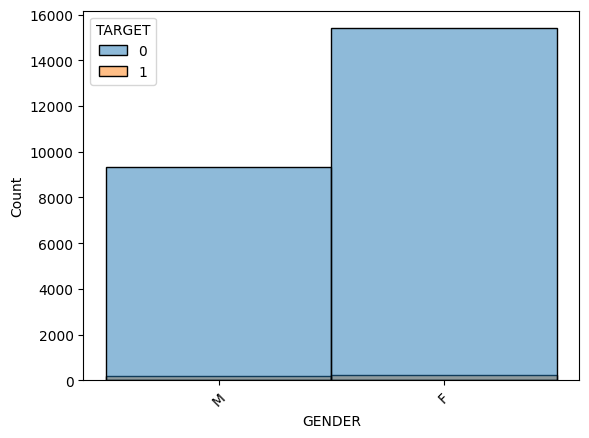

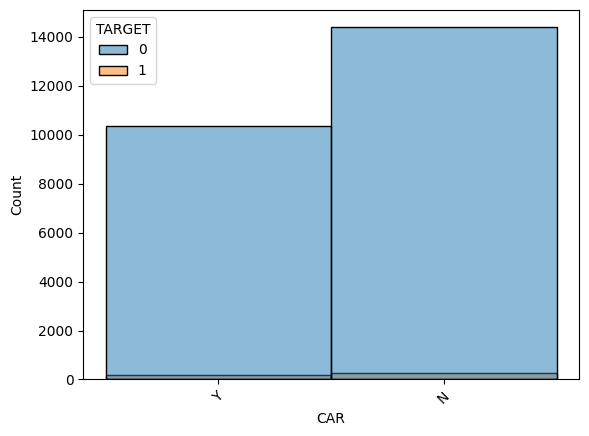

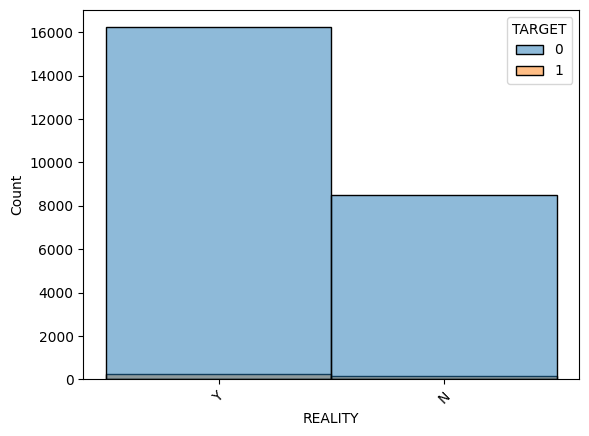

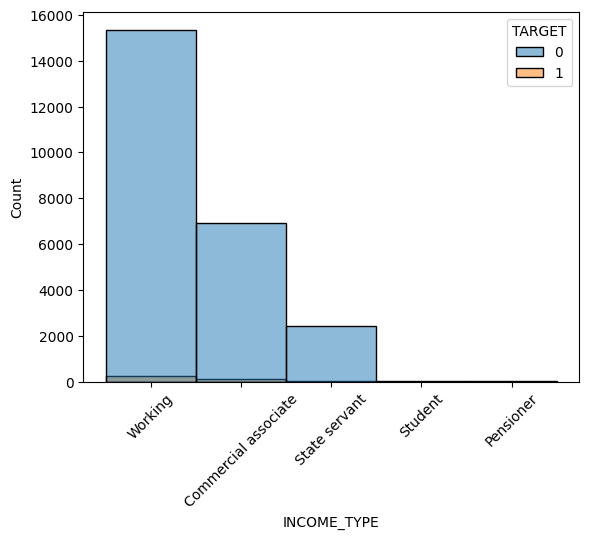

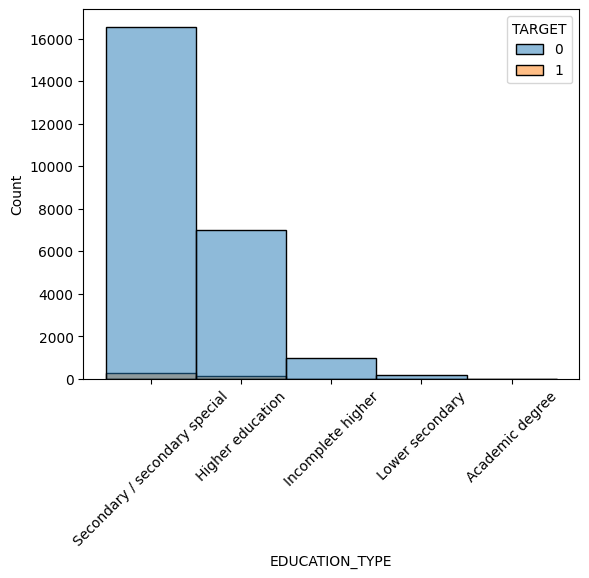

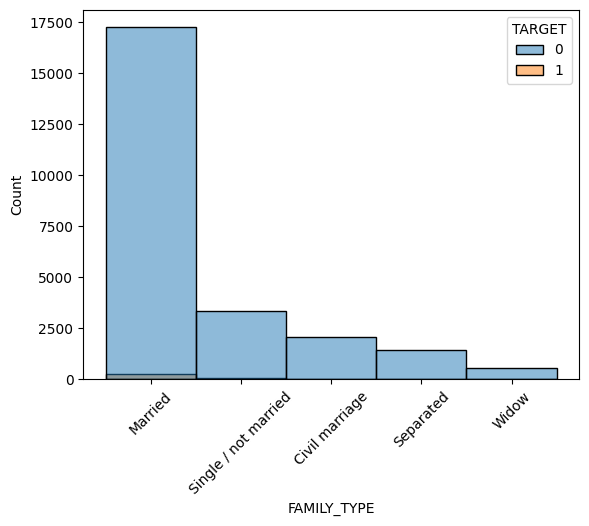

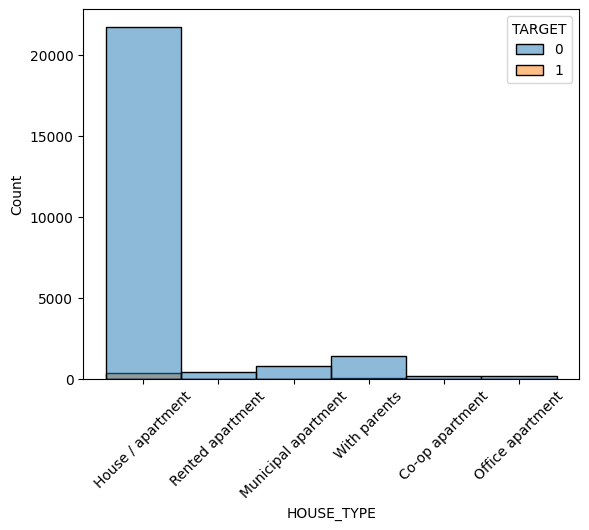

In [38]:
# check distribution of categorical features

for col in categorical_col:
    sns.histplot(df, x=col, hue='TARGET')
    plt.xticks(rotation=45)
    plt.show()


## Preprocessing

In [39]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    #drop null
    df = df.dropna()

    #drop duplicate
    df = df.drop_duplicates()

    #drop outliner in "NO_OF_CHILD"
    df = df[df['NO_OF_CHILD'] < 14]



    return df

In [40]:
df = preprocessing_data(df.copy())

In [41]:
#Check null sample in dataframe
print('Sum of null sample in data:\n ',df.isnull().sum())
#Check dulicate sample in dataframe
print('Sum of duplicate sample in dataset:',df.duplicated().sum())

Sum of null sample in data:
  Unnamed: 0        0
ID                0
GENDER            0
CAR               0
REALITY           0
NO_OF_CHILD       0
INCOME            0
INCOME_TYPE       0
EDUCATION_TYPE    0
FAMILY_TYPE       0
HOUSE_TYPE        0
FLAG_MOBIL        0
WORK_PHONE        0
PHONE             0
E_MAIL            0
FAMILY SIZE       0
BEGIN_MONTH       0
AGE               0
YEARS_EMPLOYED    0
TARGET            0
dtype: int64
Sum of duplicate sample in dataset: 0


## Feature Engineering

In [42]:
# Import label encoder
from sklearn import preprocessing

In [43]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    #Feature selection
    #Drop unecesary features
    df = df.drop(['Unnamed: 0'],axis=1)
    df = df.drop(['ID'],axis=1)
    df = df.drop(['FLAG_MOBIL'],axis=1)

    #Feature transfromation
    #Label encoding
    label_encoder = preprocessing.LabelEncoder()

    df['GENDER'] = label_encoder.fit_transform(df['GENDER'])
    df['CAR'] = label_encoder.fit_transform(df['CAR'])
    df['REALITY'] = label_encoder.fit_transform(df['REALITY'])

    #One-hot encoding
    df = pd.get_dummies(df, columns=['INCOME_TYPE'],dtype=int)
    df = pd.get_dummies(df, columns=['EDUCATION_TYPE'],dtype=int)
    df = pd.get_dummies(df, columns=['FAMILY_TYPE'],dtype=int)
    df = pd.get_dummies(df, columns=['HOUSE_TYPE'],dtype=int)

    return df



In [44]:
#Apply function
df = apply_feature_engineering(df)
df

,GENDER,CAR,REALITY,NO_OF_CHILD,INCOME,WORK_PHONE,PHONE,E_MAIL,FAMILY SIZE,BEGIN_MONTH,...,FAMILY_TYPE_Married,FAMILY_TYPE_Separated,FAMILY_TYPE_Single / not married,FAMILY_TYPE_Widow,HOUSE_TYPE_Co-op apartment,HOUSE_TYPE_House / apartment,HOUSE_TYPE_Municipal apartment,HOUSE_TYPE_Office apartment,HOUSE_TYPE_Rented apartment,HOUSE_TYPE_With parents
0,1,1,1,0,112500.0,0,0,0,2.0,29,...,1,0,0,0,0,1,0,0,0,0
1,0,0,1,0,270000.0,0,1,1,1.0,4,...,0,0,1,0,0,1,0,0,0,0
2,0,0,1,0,270000.0,0,1,1,1.0,26,...,0,0,1,0,0,1,0,0,0,0
3,0,0,1,0,270000.0,0,1,1,1.0,26,...,0,0,1,0,0,1,0,0,0,0
4,0,0,1,0,270000.0,0,1,1,1.0,38,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25129,1,1,1,0,315000.0,0,0,0,2.0,11,...,1,0,0,0,0,1,0,0,0,0
25130,0,0,1,0,157500.0,0,1,1,2.0,23,...,1,0,0,0,0,1,0,0,0,0
25131,0,0,1,0,157500.0,0,1,1,2.0,32,...,1,0,0,0,0,1,0,0,0,0
25132,0,0,1,0,283500.0,0,0,0,2.0,9,...,1,0,0,0,0,1,0,0,0,0


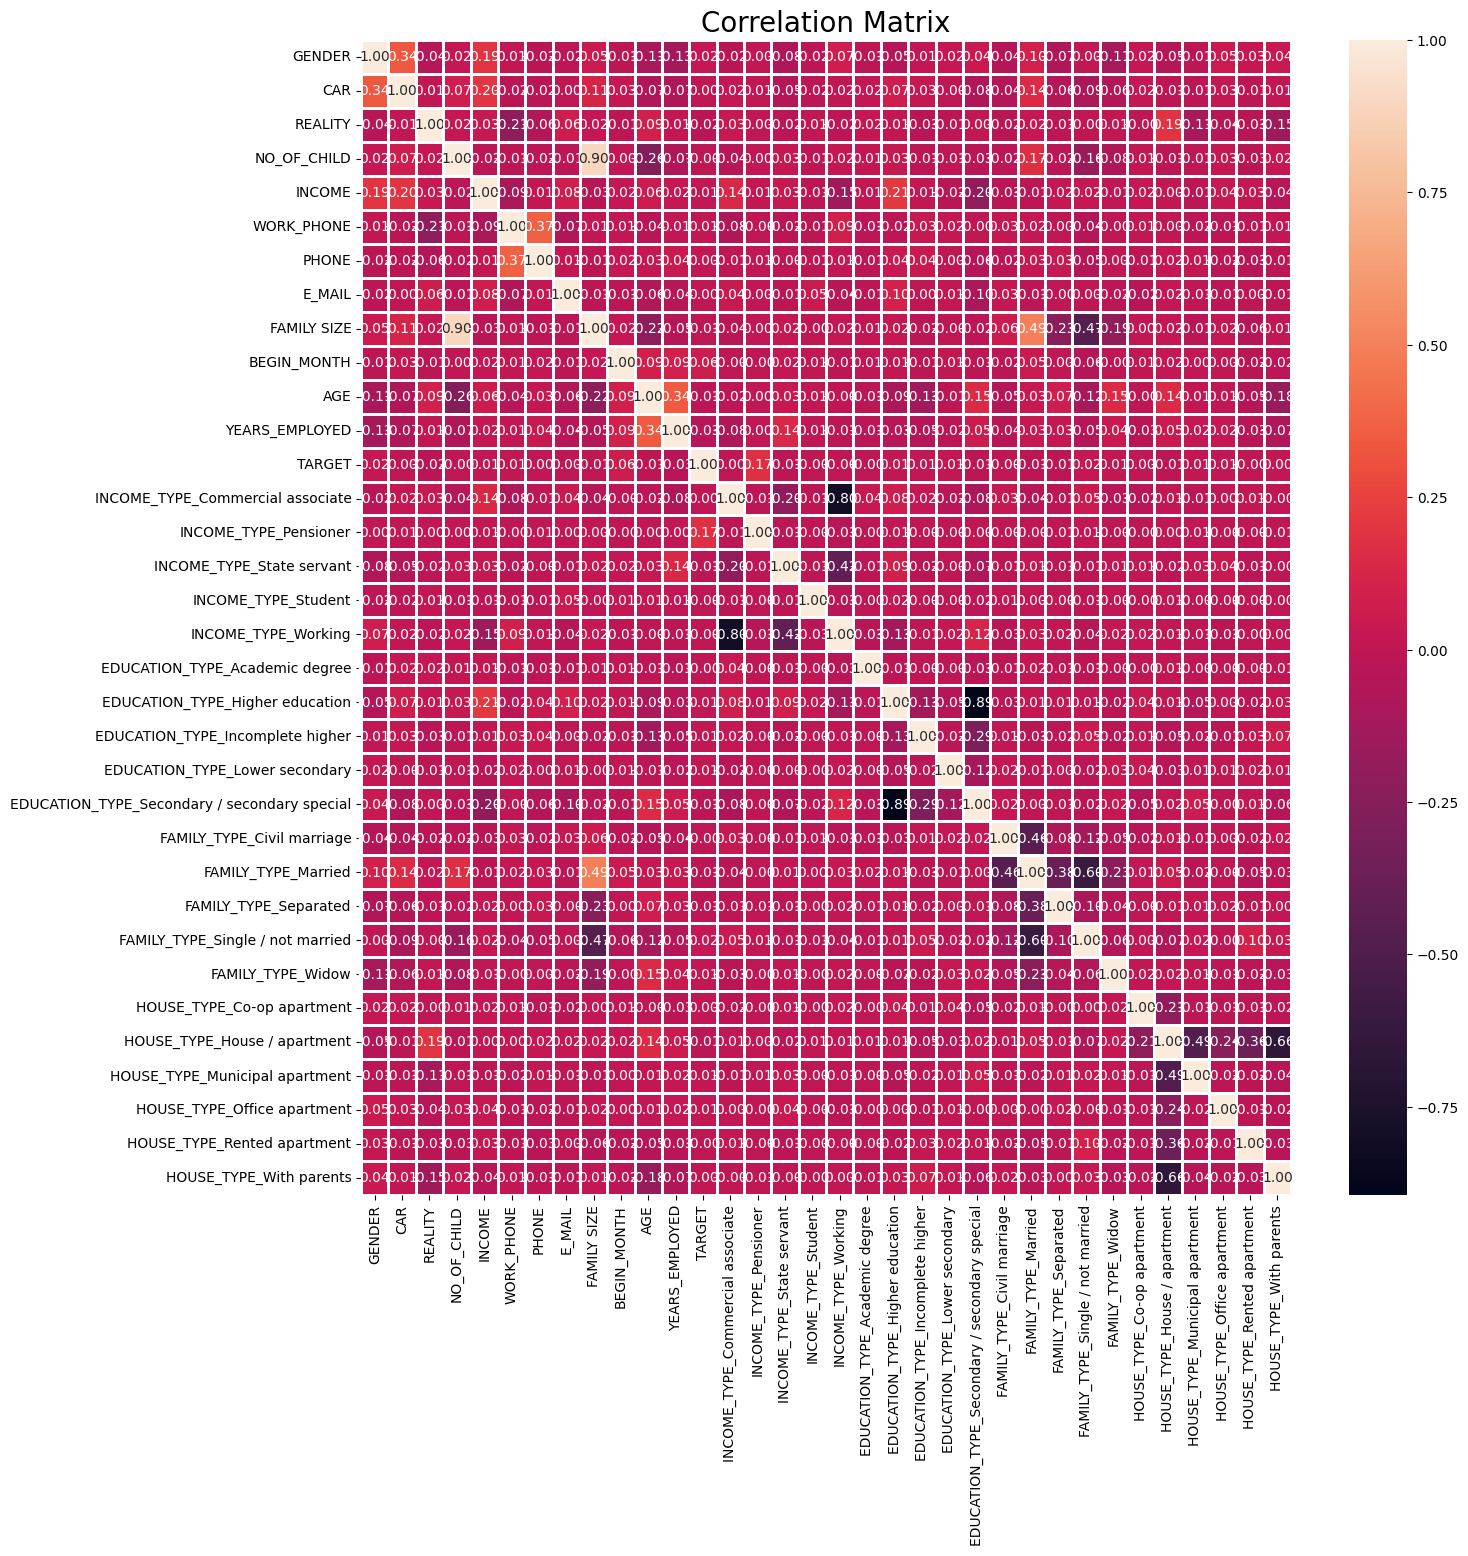

In [45]:
# Show heatmap after normalized data
plt.figure(figsize = (15, 15))
cm = sns.heatmap(df.corr(),
               linewidths = 1,
               annot = True,
               fmt = ".2f")
plt.title("Correlation Matrix", fontsize = 20)
plt.show()


In [46]:
high_corr = df.corr()['TARGET'].sort_values(ascending=False)
high_corr

TARGET                                          1.000000
INCOME_TYPE_Pensioner                           0.174081
BEGIN_MONTH                                     0.060725
FAMILY_TYPE_Single / not married                0.022663
GENDER                                          0.020726
FAMILY_TYPE_Widow                               0.010849
EDUCATION_TYPE_Lower secondary                  0.010305
HOUSE_TYPE_Municipal apartment                  0.009395
EDUCATION_TYPE_Incomplete higher                0.006875
INCOME                                          0.006530
WORK_PHONE                                      0.005868
HOUSE_TYPE_Office apartment                     0.005794
EDUCATION_TYPE_Higher education                 0.005656
PHONE                                           0.003021
HOUSE_TYPE_Co-op apartment                      0.001787
HOUSE_TYPE_With parents                         0.001319
E_MAIL                                          0.000530
INCOME_TYPE_Commercial associat

In [47]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    columns = df.columns.tolist()
    columns.remove('TARGET')

    X = df[columns]
    y = df['TARGET']
    return X, y

#Apply function
X, y = prepare_X_y(df)

# Apply machine learning model

## Train-test split

In [48]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 101
TRAIN_SIZE = 0.9

#Split data into train and test

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# SVM

In [52]:
#Chọn các parameters để tiến hành fine-tune (default values của SVM là C=1, gamma=scale, kernel=rbf)
from sklearn.model_selection import GridSearchCV
param_grid = {"C": [0.01, 0.1, 1, 10, 100, 1000],
              "gamma": ["scale", 0.001, 0.005, 0.1]}
gridsearch = make_pipeline(StandardScaler(), GridSearchCV(SVC(), param_grid, cv=10, scoring="f1", verbose=1)) #chọn số cv là 10 và score để đánh giá là f1
#Có thể tham khảo thêm svm ở đây
##.  https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [53]:
gridsearch.fit(trainX, trainY)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=10, estimator=SVC(),
                              param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                                          'gamma': ['scale', 0.001, 0.005,
                                                    0.1]},
                              scoring='f1', verbose=1))])

In [56]:
pred = gridsearch.predict(testX)
print(classification_report(testY, pred))
print(confusion_matrix(testY, pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2466
           1       0.37      0.15      0.21        47

    accuracy                           0.98      2513
   macro avg       0.68      0.57      0.60      2513
weighted avg       0.97      0.98      0.97      2513

[[2454   12]
 [  40    7]]


# SVM not use GRID

In [72]:
SVM = make_pipeline(StandardScaler(), SVC(class_weight='balanced',probability=True))
SVM.fit(trainX, trainY)

# Predictions and evaluation
y_pred = SVM.predict(testX)
print(classification_report(testY, y_pred))
print(confusion_matrix(testY, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      2466
           1       0.06      0.53      0.10        47

    accuracy                           0.83      2513
   macro avg       0.52      0.68      0.50      2513
weighted avg       0.97      0.83      0.89      2513

[[2051  415]
 [  22   25]]


# MLP

In [64]:
from sklearn.neural_network import MLPClassifier

MLP = make_pipeline(StandardScaler(), MLPClassifier(hidden_layer_sizes=(2, ), activation="logistic", learning_rate="adaptive", batch_size=32, max_iter=200))
MLP.fit(trainX, trainY)

print(classification_report(testY, MLP.predict(testX)))
print(confusion_matrix(testY, MLP.predict(testX)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2466
           1       0.00      0.00      0.00        47

    accuracy                           0.98      2513
   macro avg       0.49      0.50      0.50      2513
weighted avg       0.96      0.98      0.97      2513

[[2466    0]
 [  47    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random forest

In [63]:
# Training a Random Forest Classifier
RandomForest = RandomForestClassifier(random_state=42)
RandomForest.fit(trainX, trainY)

# Predictions and evaluation
RandomForest_pred = RandomForest.predict(testX)
print(classification_report(testY, RandomForest_pred))
print(confusion_matrix(testY, RandomForest_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2466
           1       0.43      0.19      0.26        47

    accuracy                           0.98      2513
   macro avg       0.71      0.59      0.63      2513
weighted avg       0.97      0.98      0.98      2513

[[2454   12]
 [  38    9]]


# Conclusion

In [61]:
from sklearn.metrics import roc_curve

In [74]:
# ROC curve

#fpr1, tpr1, thresh1 = roc_curve(testY, gridsearch.predict_proba(testX)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(testY, MLP.predict_proba(testX)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(testY, RandomForest.predict_proba(testX)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(testY, SVM.predict_proba(testX)[:, 1], pos_label = 1)
#fpr5, tpr5, thresh5 = roc_curve(testY, model_gnb.predict_proba(testX)[:, 1], pos_label = 1)

In [75]:
from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(testY, MLP.predict_proba(testX)[:, 1])
auc_score2 = roc_auc_score(testY, RandomForest.predict_proba(testX)[:, 1])
auc_score3 = roc_auc_score(testY, SVM.predict_proba(testX)[:, 1])

print("MLP: ", auc_score1) # Logistic Regression
print("Random Foreste: ", auc_score2) # Support Vector Machine


MLP:  0.650411554589222
Random Foreste:  0.7714534693102795


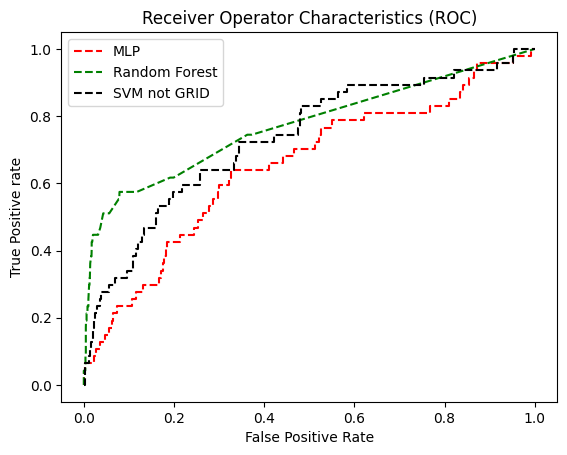

In [79]:

plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "MLP")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "black", label = "SVM not GRID")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

In [83]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return "6. " \
           "Other conclusion: The Area Under the Receiver Operating Characteristic (AUROC) curve is a measure used in binary classification tasks to evaluate the performance of a model. It represents the relationship between the true positive rate (sensitivity) and the false positive rate (1 - specificity) across different threshold values. The AUROC value ranges from 0 to 1, where a higher value indicates better discrimination between the positive and negative classes. An AUROC of 0.5 suggests random classification, while an AUROC of 1 indicates perfect classification. It provides a single scalar value to assess the overall performance of a classification model, regardless of the chosen decision threshold."

1. The Area Under the Receiver Operating Characteristic
(AUROC) curve is a measure used in binary classification tasks to evaluate the performance of a model. It represents the relationship between the true positive rate (sensitivity) and the false positive rate (1 - specificity) across different threshold values. The AUROC value ranges from 0 to 1, where a higher value indicates better discrimination between the positive and negative classes. An AUROC of 0.5 suggests random classification, while an AUROC of 1 indicates perfect classification. It provides a single scalar value to assess the overall performance of a classification model, regardless of the chosen decision threshold.

2. By using AUROC, you can evaluate a classifier's performance without being overly influenced by the class distribution. It gives insight into how well the model separates the classes, making it a more robust metric for imbalanced datasets.

3. Amongst all the trained models, Random Forest Classifier algorithm produced the highest Area under the ROC curve (AUC).